# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость нужно определять рыночную стоимость объектов недвижимости. Данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
В предоставленном файле с архивом содержатся следующие данные:  

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.


Задача — определить основные параметры объекта и степень их влияния на цену. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-чтение-файла" data-toc-modified-id="Импорт-библиотек-и-чтение-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и чтение файла</a></span></li><li><span><a href="#Получение-общей-информации-о-таблице" data-toc-modified-id="Получение-общей-информации-о-таблице-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Получение общей информации о таблице</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Определение-корреляции-параметров" data-toc-modified-id="Определение-корреляции-параметров-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение корреляции параметров</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Предобработка-&quot;balcony&quot;-(число-балконов)" data-toc-modified-id="Предобработка-&quot;balcony&quot;-(число-балконов)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Предобработка "balcony" (число балконов)</a></span></li><li><span><a href="#Предобработка-&quot;locality_name&quot;-(название-населённого-пункта)" data-toc-modified-id="Предобработка-&quot;locality_name&quot;-(название-населённого-пункта)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка "locality_name" (название населённого пункта)</a></span></li><li><span><a href="#Предобработка-&quot;airports_nearest&quot;-(расстояние-до-ближайшего-аэропорта)" data-toc-modified-id="Предобработка-&quot;airports_nearest&quot;-(расстояние-до-ближайшего-аэропорта)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Предобработка "airports_nearest" (расстояние до ближайшего аэропорта)</a></span></li><li><span><a href="#Предобработка-&quot;floors_total&quot;-(всего-этажей-в-доме)" data-toc-modified-id="Предобработка-&quot;floors_total&quot;-(всего-этажей-в-доме)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Предобработка "floors_total" (всего этажей в доме)</a></span></li><li><span><a href="#Предобработка-&quot;cityCenters_nearest&quot;-(расстояние-до-центра-города)" data-toc-modified-id="Предобработка-&quot;cityCenters_nearest&quot;-(расстояние-до-центра-города)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Предобработка "cityCenters_nearest" (расстояние до центра города)</a></span></li><li><span><a href="#Предобработка-&quot;living_area&quot;-(жилая-площадь)-и-&quot;kitchen_area&quot;(площадь-кухни)" data-toc-modified-id="Предобработка-&quot;living_area&quot;-(жилая-площадь)-и-&quot;kitchen_area&quot;(площадь-кухни)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Предобработка "living_area" (жилая площадь) и "kitchen_area"(площадь кухни)</a></span></li><li><span><a href="#Предобработка-&quot;ceiling_height&quot;-(высота-потолка)" data-toc-modified-id="Предобработка-&quot;ceiling_height&quot;-(высота-потолка)-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Предобработка "ceiling_height" (высота потолка)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Средняя-цена-квадратного-метра-(&quot;price_m&quot;)" data-toc-modified-id="Средняя-цена-квадратного-метра-(&quot;price_m&quot;)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Средняя цена квадратного метра ("price_m")</a></span></li><li><span><a href="#Дата-публикации-(&quot;date_exposition&quot;)" data-toc-modified-id="Дата-публикации-(&quot;date_exposition&quot;)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дата публикации ("date_exposition")</a></span></li><li><span><a href="#Классификация-этажа-(&quot;floor_classification&quot;-и-&quot;floor_id&quot;)" data-toc-modified-id="Классификация-этажа-(&quot;floor_classification&quot;-и-&quot;floor_id&quot;)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Классификация этажа ("floor_classification" и "floor_id")</a></span></li><li><span><a href="#Отношение-жилой-площади-к-общей-(&quot;living_total_area&quot;)" data-toc-modified-id="Отношение-жилой-площади-к-общей-(&quot;living_total_area&quot;)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Отношение жилой площади к общей ("living_total_area")</a></span></li><li><span><a href="#Отношение-площади-кухни-к-общей-площади-(&quot;kitchen_total_area&quot;)" data-toc-modified-id="Отношение-площади-кухни-к-общей-площади-(&quot;kitchen_total_area&quot;)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Отношение площади кухни к общей площади ("kitchen_total_area")</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-основных-параметров" data-toc-modified-id="Анализ-основных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ основных параметров</a></span></li><li><span><a href="#Исследование-значений-времени-продажи-квартиры" data-toc-modified-id="Исследование-значений-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование значений времени продажи квартиры</a></span></li><li><span><a href="#Влияние-основных-параметров-на-стоимость-квартиры" data-toc-modified-id="Влияние-основных-параметров-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние основных параметров на стоимость квартиры</a></span></li><li><span><a href="#Анализ-населенных-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="Анализ-населенных-пунктов-с-наибольшим-числом-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ населенных пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Анализ-объектов-Санкт-Петербурга-по-расстоянию-до-центра-города" data-toc-modified-id="Анализ-объектов-Санкт-Петербурга-по-расстоянию-до-центра-города-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ объектов Санкт-Петербурга по расстоянию до центра города</a></span></li><li><span><a href="#Анализ-зависимости-цены-объектов-в-центре-Санкт-Петербурга-от-основных-параметров" data-toc-modified-id="Анализ-зависимости-цены-объектов-в-центре-Санкт-Петербурга-от-основных-параметров-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ зависимости цены объектов в центре Санкт-Петербурга от основных параметров</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

### Импорт библиотек и чтение файла

Импортируем библиотеки:

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

Читаем файл "real_estate_data.csv" в таблицу "df":

In [4]:
try:
    df = pd.read_csv('/good_dfsets/real_estate_data.csv', sep="\t")
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep="\t")

### Получение общей информации о таблице

Выводим общие сведения о таблице:

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выводим первые 5 строк таблицы:

In [6]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выводим описательную статистику для строковых значений:

In [7]:
df.describe(include='object').T

,count,unique,top,freq
first_day_exposition,23699,1491,2018-02-01T00:00:00,368
is_apartment,2775,2,False,2725
locality_name,23650,364,Санкт-Петербург,15721


Выводим описательную статистику для числовых значений:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Определяем количество пропущенных значений в каждом столбце:

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определяем процент пропущенных значений в каждом столбце:

In [10]:
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Находим уникальные значения в столбце "locality_name" (название населённого пункта):

In [11]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

### Вывод

1. В таблице 23699 строк и 22 столбца. Данные имеют типы "int64", "float64", "object" и "bool". Для обработки таблицы требуется 8.1 MB памяти.
2. В столбце "last_price" максимальное значение (763000000) в 112 раз превышает значение третьей квартили (6800000), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
3. В столбце "total_area" максимальное значение (900) в 13 раз превышает значение третьей квартили (69,9), а минимальное (12190) в 278 раз меньше значения первой квартили (3400000), что свидетельствует о наличие "выбросов".
2. В столбце "ceiling_height" (высота потолков) пропущено 9195 значений. Можно предположить, что во многих новостройках застройщики в целях экономии закладывают минимальную высоту потолка, допустимую по СНиП 31-01-2003 - 2,5 метра с небольшим допуском в большую сторону. Вероятно, поэтому продавцы не считают нужным отдельно указывать высоту потолков. Так же, возможно, потолки в жилых помещениях и коридоре имеют разную высоту, отчего продавец не может определиться, какую именно требуется указать в объявлении (по СНиП 31-01-2003 минимальная высота потолка в коридоре - 2,1 метра). В виду невозможности определить точную причину пропусков и их большого количества, целесообразно эти данные оставить незаполненными.
3. В столбце "ceiling_height" (высота потолков) присутствуют необъяснимо высокие значения: максимальное - 100. Причиной может быть как небрежность продавца при составлении объявления, так и технический сбой. В случае небольшого количества таких "выбросов" имеет смысл удалить соответствующие объекты из таблицы.
4. В столбце "floors_total" (всего этажей в доме) пропущено 86 значений. Возможно, здания одноэтажные. Нужно сравнить с этажом помещения. Этажность дома - один из основных параметров выбора жилья, поэтому трудно предположить, что продавец осознанно его ну указал. Можно предположить, данные утеряны в процессе выгрузки. В виду малого количества пропусков относительно общего числа объектов, строки с пропущенными значениями "floors_total" целесообразно удалить.
5. В столбце "living_area" (жилая площадь в квадратных метрах) пропущено 1903 значений. Можно предположить, что продавец считает достаточным указать общую площадь и площадь кухни, из чего покупатель может составить представление о жилой площади. Однако при таком подходе не учитывается площадь других нежилых площадей: коридор, балкон и т.д. Поскольку даже квартиры с одинаковым количеством комнат, с высокой степенью вероятности, отличаются планировкой однозначно определить жилую площадь не представляется возможным. В виду большого количества пропусков их удаление отразится на результатах исследования, имеет смысл их оставить (незаполненными).
6. В столбце "is_apartment" (апартаменты) пропущено 20924 значений. Вероятно, рекламодатель не стал уточнять тип недвижимости, т.к. законодательством предусмотрены механизмы перевода как жилого фонда в нежилой, так и наоборот. Поэтому покупатель может переоформить недвижимость по своему усмотрению. Поскольку однозначно отнести объекты с пропущенными значениями к жилому или нежилому фонду, а их удаление из таблицы лишит исследование 88% данных, целесообразно оставить их незаполненными.
7. В столбце "kitchen_area" (площадь кухни) пропущено 2278 значений. Можно предположить, что продавец считает достаточным указать общую площадь и площадь кухни, из чего покупатель может составить представление о жилой площади. Однако при таком подходе не учитывается площадь других нежилых площадей: коридор, балкон и т.д. Поскольку даже квартиры с одинаковым количеством комнат, с высокой степенью вероятности, отличаются планировкой однозначно определить площадь кухни не представляется возможным. В виду большого количества пропусков их удаление отразится на результатах исследования, имеет смысл их оставить (незаполненными).
8. В столбце "balcony" (число балконов) пропущено 11519 значений. Можно предположить, что значения не указаны для объектов, не имеющих балконов. Пропущенные значения стоит заменить на "0".
9. В столбце "locality_name" (название населённого пункта) пропущено 49 значений. Поскольку для продажи недвижимости местоположение недвижимости имеет критическое значение, объекты с пропущенными значениями следует удалить.
10. В столбце "airports_nearest" (расстояние до ближайшего аэропорта) пропущено 5542 значения. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или аэропорта. Возможен также сбой при выгрузке данных.
11. В столбце "cityCenters_nearest" (расстояние до центра города) пропущено 5519 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или центра города. Возможен также сбой при выгрузке данных.
12. В столбце "parks_around3000" (число парков в радиусе 3 км) пропущено 5518 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или парка. Возможен также сбой при выгрузке данных.
13. В столбце "parks_nearest" (расстояние до ближайшего парка) пропущено 15620 значения. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или парка. Возможен также сбой при выгрузке данных.
14. В столбце "ponds_around3000" (число водоёмов в радиусе 3 км) пропущено 5518 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или водоемов. Возможен также сбой при выгрузке данных.
15. В столбце "ponds_nearest" (расстояние до ближайшего водоёма) пропущено 14589 значений. Поскольку данный параметр указывается автоматически, пропуски являются следствием технического сбоя при определении точного местоположения квартиры или водоема. Возможен также сбой при выгрузке данных.
16. В столбце "days_exposition" (сколько дней было размещено объявление) пропущено 3181 значения. Данные о продолжительности размещения объявления хранится в системе рекламной площадки. Потеря значений может быть связано только с техническим сбоем, в том числе при выгрузке данных. Поскольку удаление соответствующих объектов из таблицы лишит исследование 13% данных, целесообразно оставить значения без изменений.
17. В столбце "locality_name" присутствуют неявные дубли.

## Предобработка данных

### Определение корреляции параметров

В целях определения взаимного влияния параметров вычисляем их корреляцию:

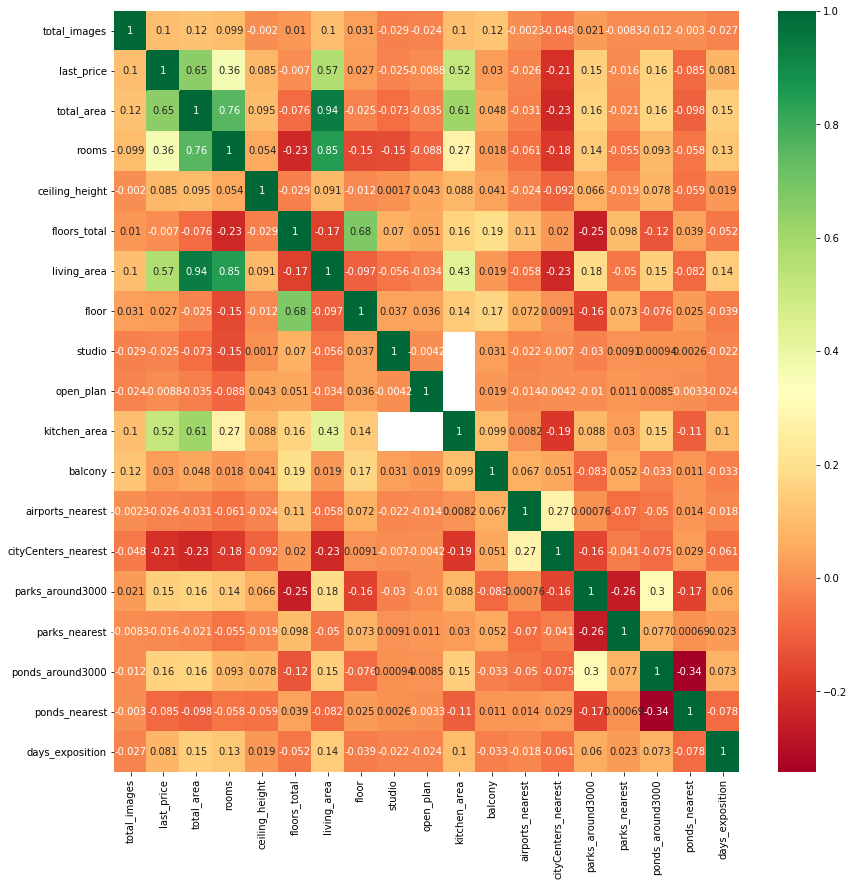

In [12]:
ax = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
ax.figure.set_figwidth(14)
ax.figure.set_figheight(14)
plt.show()

### Изменение типов данных

Данные столбцов "total_images", "rooms" и "floor" имеют тип "int64" (размер числа - 8 байт). Поскольку значения целочисленные, положительные и попадают в диапазон 0 - 255, целесообразно заменить тип на "uint8" (размер числа - 1 байт).  
Изменяем тип данных столбцов "total_images", "rooms" и "floor":

In [13]:
try:
    df['total_images'] = df['total_images'].astype('uint8')
    df['rooms'] = df['rooms'].astype('uint8')
    df['floor'] = df['floor'].astype('uint8')
except:
    print('Некорректный тип данных')

Значения "last_price" - вещественные, имеют тип "float64". Переводим их в целочисленные. Поскольку значения укладываются в диапазон 0-4294967295, заменяем тип на "uint32" (размер числа - 4 байт):

In [14]:
try:
    df['last_price'] = df['last_price'].astype('uint32')
except:
    print('Некорректный тип данных')

### Предобработка "balcony" (число балконов)

Предполагаем, что параметр "balcony" не указан для объектов, у которых балкон отсутствует. Заменяем пропущенные значения на 0 и изменяем тип данных на "uint8" (так как значения целочисленные, положительные и попадают в диапазон 0 - 255):

In [15]:
df['balcony'] = df['balcony'].fillna(0).astype('uint8')

### Предобработка "locality_name" (название населённого пункта)

Создаем из таблицы "df" таблицу "good_df" для корректировки данных и удаляем из нее строки с пропущенными значениями "locality_name":

In [16]:
good_df = df.loc[~df['locality_name'].isnull()].reset_index(drop=True)

Выводим общую информацию о таблице:

In [17]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null uint8
last_price              23650 non-null uint32
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null uint8
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null uint8
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null uint8
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000  

In [18]:
print('Из таблицы удалено {} строк, в которых не указано название населенного пункта.'
      .format(len(df.index) - len(good_df.index)))

Из таблицы удалено 49 строк, в которых не указано название населенного пункта.


### Предобработка "airports_nearest" (расстояние до ближайшего аэропорта)

Расстояние от квартиры до аэропорта можно вычислить, если в данном населенном пункте есть другие объекты, для которых расстояние указано. Для этого из выборки объектов по определенному населенному пункту вычисляем медиану расстояния до аэропорта.  
Чтобы получить уникальные названия населенных пунктов, добавляем в таблицу столбец и заполняем его очищенными от неявных дубликатов значениями столбца "locality_name".

In [19]:
def locality_klass(locality):                      
    locality_list = locality.split()                  # разделяем строки названий городов на слова
    letter_list=[]                                    # список, в который будем складывать результаты
    for i in range(len(locality_list)):               # перебераем отдельные слова из названий городов
        if not locality_list[i].islower():            # если в слове есть заглавные буквы
            letters = []                              # словарь, в который будем складывать символы
            for j in locality_list[i]:                # проходимся по каждому символу
                if j == 'Ё':                          # заменяем Ё на Е
                    j = 'Е'
                elif j == 'ё':
                    j = 'е'
                letters.append(j)                     # добавляем символы в список
            word = ''.join(letters)                   # объединяем список в слово
            letter_list.append(word)                  # добавляем слово в список
    return ' '.join(letter_list)                      # объединяем список в строку и возвращаем ее
good_df['locality_name_unique'] = good_df['locality_name'].apply(locality_klass).astype('category')

Выводим первые 5 строк таблицы:

In [20]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Поскольку Санкт-Петербург - крупный город (площадь 1439 кв.км.), то расстояние до аэропорта может значительно меняться в зависимости от района. Поэтому исключаем его из расчета.  
Заменяем пропущенные значения "airports_nearest" медианами, рассчитанными для каждого населенного пункта:

In [21]:
airports_isna = good_df['airports_nearest'].isna().sum()            # количество пустых ячеек до обработки
locality_unique = good_df['locality_name_unique'].unique()          # список уникальных значений столбца "locality_name_unique"
# проходим циклом по списку уникальных значений столбца "locality_name_unique"
for i in locality_unique:
    if i != 'Санкт-Петербург':
    # заменяем пропуски на медианы
        good_df.loc[(good_df['airports_nearest'].isna()) & (good_df['locality_name_unique'] == i), 'airports_nearest'] =\
        good_df.loc[(~good_df['airports_nearest'].isna()) & (good_df['locality_name_unique'] == i), 'airports_nearest'].median()

Выводим общую информацию о таблице:

In [22]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
total_images            23650 non-null uint8
last_price              23650 non-null uint32
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null uint8
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null uint8
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null uint8
locality_name           23650 non-null object
airports_nearest        18736 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000  

In [23]:
print('Для "airports_nearest" заменено на конкретные значения {} пропусков.'.format(airports_isna - good_df['airports_nearest'].isna().sum()))

Для "airports_nearest" заменено на конкретные значения 620 пропусков.


### Предобработка "floors_total" (всего этажей в доме)

Удаляем пропущенные значения и меняем тип оставшихся на "uint8" (так как значения целочисленные, положительные и попадают в диапазон 0 - 255):

In [24]:
floors_total_isna = good_df['floors_total'].isna().sum()                       # количество пустых ячеек до обработки
good_df = good_df.loc[~good_df['floors_total'].isna()].reset_index(drop=True)  # оставляем в таблице непустые значения
good_df['floors_total'] = good_df['floors_total'].astype('uint8')              # назначаем данным тип

In [25]:
print('Из таблицы удалено {} строк, для которых не указана этажность здания.'
      .format(floors_total_isna - good_df['floors_total'].isna().sum()))

Из таблицы удалено 85 строк, для которых не указана этажность здания.


### Предобработка "cityCenters_nearest" (расстояние до центра города)

Для удобства расчетов и анализа округляем значения "cityCenters_nearest". Минимальное значение "cityCenters_nearest" - 181,0 м - достаточно велико, чтобы пренебречь дробной частью.

In [26]:
good_df['cityCenters_nearest'] = good_df['cityCenters_nearest'].round()

### Предобработка "living_area" (жилая площадь) и "kitchen_area"(площадь кухни)

Жилая площадь ("living_area") и площадь кухни ("kitchen_area") наиболее коррелируются с общей площадью ("total_area") (см.п. 2.1). Заменяем пропуски "living_area" и "kitchen_area" медианами соответствующих параметров, рассчитанных в зависимости от общей площади и количества комнат:

In [27]:
living_area_isna = good_df['living_area'].isna().sum()              # количество пустых ячеек до обработки
kitchen_area_isna = good_df['kitchen_area'].isna().sum()            # количество пустых ячеек до обработки
total_area_unique = good_df['total_area'].round().unique()          # список уникальных значений столбца "total_area"
# проходим циклом по списку уникальных значений столбца "total_area"
for i in total_area_unique:
    # заменяем пропуски на медианы
    good_df.loc[(good_df['living_area'].isna()) & (good_df['total_area'].round() == i), 'living_area'] =\
    good_df.loc[(~good_df['living_area'].isna()) & (good_df['total_area'].round() == i), 'living_area'].median()
    
    good_df.loc[(good_df['kitchen_area'].isna()) & (good_df['total_area'].round() == i), 'kitchen_area'] =\
    good_df.loc[(~good_df['kitchen_area'].isna()) & (good_df['total_area'].round() == i), 'kitchen_area'].median()

Выводим общую информацию о таблице:

In [28]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
total_images            23565 non-null uint8
last_price              23565 non-null uint32
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null uint8
ceiling_height          14481 non-null float64
floors_total            23565 non-null uint8
living_area             23551 non-null float64
floor                   23565 non-null uint8
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23542 non-null float64
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18658 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000    

In [29]:
print('Для "living_area" заменено на конкретные значения {} пропусков.'
      .format(living_area_isna - good_df['living_area'].isna().sum()))
print('Для "kitchen_area" заменено на конкретные значения {} пропусков.'
      .format(kitchen_area_isna - good_df['kitchen_area'].isna().sum()))

Для "living_area" заменено на конкретные значения 1851 пропусков.
Для "kitchen_area" заменено на конкретные значения 2199 пропусков.


### Предобработка "ceiling_height" (высота потолка)

Для замены пропусков значений высоты потолков предполагаем, что объекты с одинаковым количеством комнат и одинаковой общей площадью имеют одинаковую планировку, то есть являются объектами типовой застройки. Заменяем пропуски "ceiling_height" медианами соответствующих параметров, рассчитанных в зависимости от общей площади и количества комнат:

In [30]:
ceiling_height_isna = good_df['ceiling_height'].isna().sum()                 # количество пустых ячеек до обработки
rooms_unique = good_df['rooms'].unique()                                     # получаем уникальные значения
for i in total_area_unique:                                                  # проходим циклом по уникальным значениям
    for j in rooms_unique:                                                   # проходим циклом по уникальным значениям
        # заменяем пропуски на медианы
        good_df.loc[(good_df['ceiling_height'].isna()) &
                    (good_df['rooms'] == j) &
                    (good_df['total_area'].round() == i), 'ceiling_height'] =\
        good_df.loc[(~good_df['ceiling_height'].isna()) &
                    (good_df['rooms'] == j) &
                    (good_df['total_area'].round() == i), 'ceiling_height'].median()

Выводим общую информацию о таблице:

In [31]:
good_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
total_images            23565 non-null uint8
last_price              23565 non-null uint32
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null uint8
ceiling_height          23417 non-null float64
floors_total            23565 non-null uint8
living_area             23551 non-null float64
floor                   23565 non-null uint8
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23542 non-null float64
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18658 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000    

In [32]:
print('Для "ceiling_height" заменено на конкретные значения {} пропусков.'
      .format(ceiling_height_isna - good_df['ceiling_height'].isna().sum()))

Для "ceiling_height" заменено на конкретные значения 8936 пропусков.


Выводим первые 5 строк таблицы:

In [33]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


### Вывод

В результате предобработки данных количество строк в таблице уменьшено на 1% (с 23699 до 23565).  В целях оптимизации потребляемых ресурсов изменен тип столбцов:
- "total_images", "rooms", "floors_total", "floor", "balcony" - на "uint8";
- "last_price" - uint32.  

Объем памяти, используемой для обработки таблицы, снижен на 12% (с 8,1 до 7,2 MB).  
Пропущенные значения в столбце "balcony" заменены на "0".  
Из таблицы удалено 49 строк, в которых не указано название населенного пункта.   
Из таблицы удалено 85 строк, для которых не указана этажность здания.  
Для "airports_nearest" заменено на конкретные значения 620 пропусков.  
Для "living_area" заменено на конкретные значения 1851 пропусков.  
Для "kitchen_area" заменено на конкретные значения 2199 пропусков.  
Для "ceiling_height" заменено на конкретные значения 8936 пропусков.  
Значения расстояния до центра города округлены.

## Расчёты и добавление результатов в таблицу

### Средняя цена квадратного метра ("price_m")

Добавляем в таблицу "good_df" столбец "price_m" , содержащий значения средней цены квадратного метра для каждого объекта, и назначаем им тип "uint32" (так как значения укладываются в диапазон 0-4294967295, а дробная часть незначительна, чтобы учитывать ее в исследовании):

In [34]:
good_df['price_m'] = (good_df['last_price'] / good_df['total_area']).astype('uint32')

Выводим первые 5 строк таблицы:

In [35]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000


### Дата публикации ("date_exposition")

Добавляем в таблицу "good_df" столбец "date_exposition", содержащий даты публикаций объявлений, приведенные к формату dd-mm-yyyy:

In [36]:
good_df['date_exposition'] = pd.to_datetime(good_df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S').dt.strftime('%d-%m-%Y')

Выводим первые 5 строк таблицы:

In [37]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m,date_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370,07-03-2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920,04-12-2018
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785,20-08-2015
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176,24-07-2015
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000,19-06-2018


### Классификация этажа ("floor_classification" и "floor_id")

Необходимо назначить объектам классификацию по этажам: "Первый", "Последний", "Другой".  
Создаем словарь соответствия числовой классификации "floor_id" и текстовой "floor_classification":

In [38]:
floor_dict = {1: 'первый', 2: 'другой', 3: 'последний'}

Для каждой категории этажа назначаем числовую классификацию:

In [39]:
good_df.loc[(good_df['floor'] == 1), 'floor_id'] = 1
good_df.loc[(good_df['floors_total'] != good_df['floor']) & (good_df['floor'] != 1), 'floor_id'] = 2
good_df.loc[(good_df['floors_total'] == good_df['floor']) & (good_df['floors_total'] != 1), 'floor_id'] = 3
good_df['floor_id'] = good_df['floor_id'].astype('uint8')

Добавляем в таблицу "good_df" столбец "floor_classification", содержащий данные по классификации этажей объектов, и назначаем данным тип "category":

In [40]:
for i in floor_dict:
    good_df.loc[(good_df['floor_id'] == i), 'floor_classification'] = floor_dict.get(i)
good_df['floor_classification'] = good_df['floor_classification'].astype('category')

Выводим первые 5 строк таблицы:

In [41]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m,date_exposition,floor_id,floor_classification
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370,07-03-2019,2,другой
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,Шушары,82920,04-12-2018,1,первый
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785,20-08-2015,2,другой
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176,24-07-2015,2,другой
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000,19-06-2018,2,другой


### Отношение жилой площади к общей ("living_total_area")

Добавляем в таблицу "good_df" столбец "living_total_area", содержащий значения отношения жилой площади к общей:

In [42]:
good_df['living_total_area'] = good_df['living_area'] / good_df['total_area']

Выводим первые 5 строк таблицы:

In [43]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m,date_exposition,floor_id,floor_classification,living_total_area
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,482.0,2.0,755.0,NaN,Санкт-Петербург,120370,07-03-2019,2,другой,0.472222
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,NaN,0.0,NaN,81.0,Шушары,82920,04-12-2018,1,первый,0.460396
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,90.0,2.0,574.0,558.0,Санкт-Петербург,92785,20-08-2015,2,другой,0.612500
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,84.0,3.0,234.0,424.0,Санкт-Петербург,408176,24-07-2015,2,другой,0.597484
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,112.0,1.0,48.0,121.0,Санкт-Петербург,100000,19-06-2018,2,другой,0.320000


### Отношение площади кухни к общей площади ("kitchen_total_area")

Добавляем в таблицу "good_df" столбец "kitchen_total_area", содержащий значения отношения площади кухни к общей площади:

In [44]:
good_df['kitchen_total_area'] = good_df['kitchen_area'] / good_df['total_area']

Выводим первые 5 строк таблицы:

In [45]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,price_m,date_exposition,floor_id,floor_classification,living_total_area,kitchen_total_area
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,2.0,755.0,NaN,Санкт-Петербург,120370,07-03-2019,2,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,0.0,NaN,81.0,Шушары,82920,04-12-2018,1,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,...,2.0,574.0,558.0,Санкт-Петербург,92785,20-08-2015,2,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,...,3.0,234.0,424.0,Санкт-Петербург,408176,24-07-2015,2,другой,0.597484,0.100629
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,Санкт-Петербург,100000,19-06-2018,2,другой,0.320000,0.410000


In [46]:
good_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 29 columns):
total_images            23565 non-null uint8
last_price              23565 non-null uint32
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null uint8
ceiling_height          23417 non-null float64
floors_total            23565 non-null uint8
living_area             23551 non-null float64
floor                   23565 non-null uint8
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23542 non-null float64
balcony                 23565 non-null uint8
locality_name           23565 non-null object
airports_nearest        18658 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000    

### Вывод

В таблицу добавлен столбец "locality_name_unique", содержащий очищенные от неявных дубликатов, уникальные наименования населенных пунктов, в которых находятся объекты продажи.  
Добавлен столбец "date_exposition", в который внесены даты публикаций объявлений, приведенные к формату "dd-mm-yyyy".  
Добавлена классификация объектов по этажам: "первый", "последний", "другой".  
Рассчитаны и добавлены в таблицу:
- средняя цена квадратного метра ("price_m");
- отношение жилой площади к общей ("living_total_area");
- отношение площади кухни к общей площади ("kitchen_total_area").  

Объем таблицы увеличен на 21% (с 7.1 до 9,0 MB).

## Исследовательский анализ данных

### Анализ основных параметров

Необходимо провести анализ основных параметров ("last_price", "total_area", "rooms", "ceiling_height"): оценить распределение объявлений в зависимости от значений данных характеристик, определить диапазоны, в которых лежат значения, пригодные для дальнейшего исследования.  
Создаем словари данных параметров, значения которых будут использоваться в диаграммах:

In [47]:
parameters = {'last_price': 'Распределение цен',
              'total_area': 'Распределение общей площади',
              'rooms': 'Распределение по количеству комнат',
              'ceiling_height': 'Распределение по высоте потолков'}
parameters_x = {'last_price': 'Цена',
              'total_area': 'Общая площадь',
              'rooms': 'Количество комнат',
              'ceiling_height': 'Высота потолка'}

Строим диаграмму распределения значений и диаграмму размаха для каждого параметра:

last_price


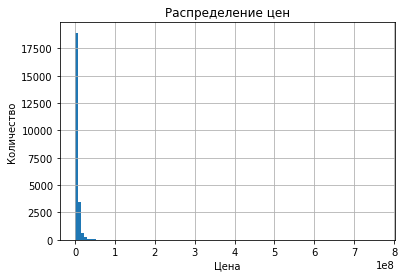

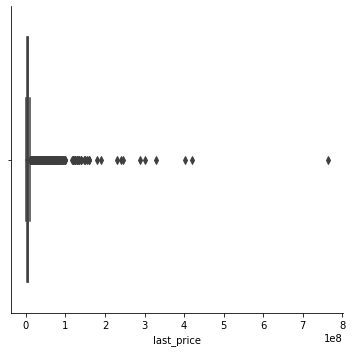

__________________________________________

total_area


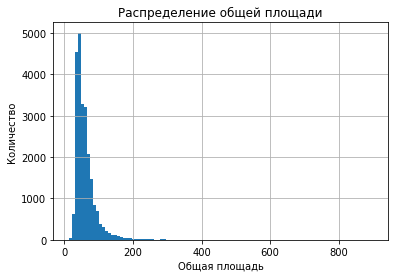

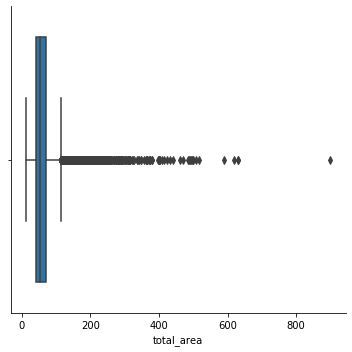

__________________________________________

rooms


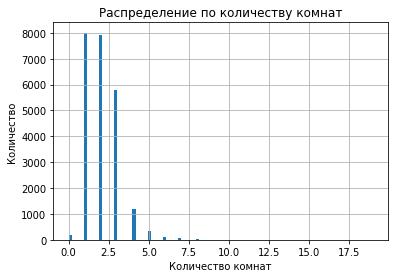

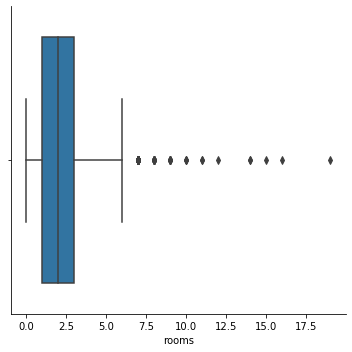

__________________________________________

ceiling_height


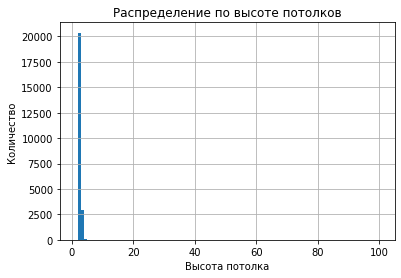

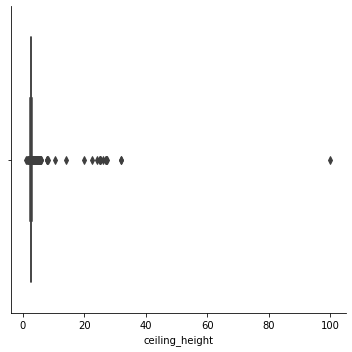

__________________________________________



In [51]:
for i in parameters:
    ax = good_df[i].hist(bins=100)
    ax.set_title(parameters.get(i))
    ax.set_ylabel('Количество')
    ax.set_xlabel(parameters_x.get(i))
    ax1 = sns.catplot(kind='box', x=i, data=good_df)
    print(i)
    plt.show()
    print('__________________________________________')
    print()

По диаграммам и таблице определяем проблемы в данных, негативно сказывающиеся на ходе и результате исследования:
- У каждого параметра выбросы за пределы Q3+1,5*IQR;  
- Неправдоподобные низкие значения цены: минимальная - 12190;  
- Минимальное количество комнат - 0;  
- У некоторых объектов высота потолка ниже минимально допустимой по стандарту - 2,5 метра.

Исключаем из исследования некорректные значения. Строим диаграммы, по следующим условиям:  
- диапазон значений от Q1-1,5*IQR до Q3+3*IQR;
- Минимальная цена - 1 млн;
- Минимальное количество комнат - 1;
- Минимальная высота потолка - 2,5.

Строим диаграммы распределений значений и диаграммы размаха:

last_price


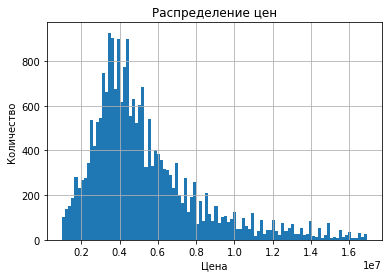

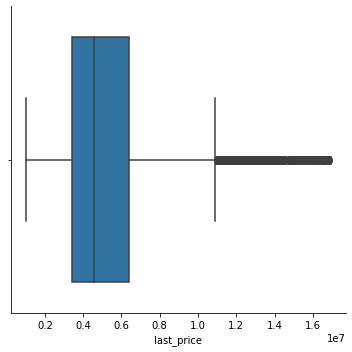

Удалено 1212 строк.
Новая медиана = 4550000.0
Новое среднее = 5316526.574061647
Отношение новой медианы к исходной = 0.978494623655914
Отношение нового среднего к исходному = 0.8127320852796546
count    2.235300e+04
mean     5.316527e+06
std      2.886915e+06
min      1.010000e+06
25%      3.400000e+06
50%      4.550000e+06
75%      6.405000e+06
max      1.691307e+07
Name: last_price, dtype: float64
__________________________________________

total_area


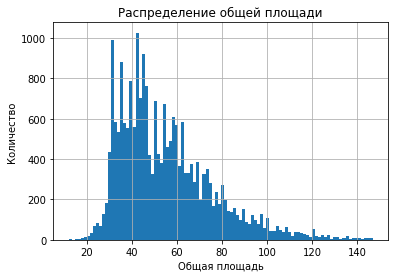

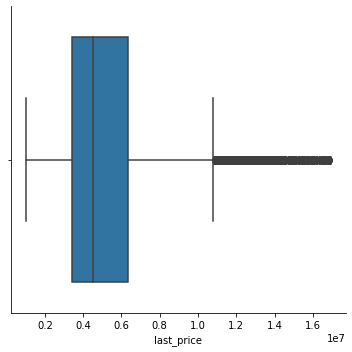

Удалено 143 строк.
Новая медиана = 50.6
Новое среднее = 55.232588473660506
Отношение новой медианы к исходной = 0.9730769230769231
Отношение нового среднего к исходному = 0.9152249066106352
count    22210.000000
mean        55.232588
std         20.978348
min         12.000000
25%         39.800000
50%         50.600000
75%         66.000000
max        146.900000
Name: total_area, dtype: float64
__________________________________________

rooms


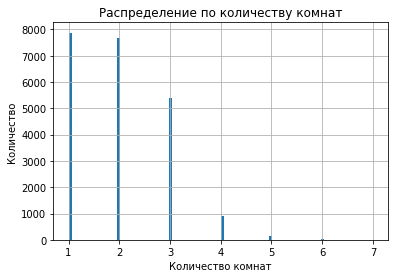

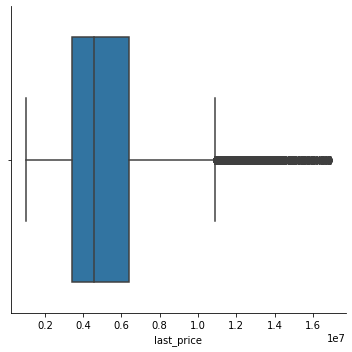

Удалено 192 строк.
Новая медиана = 2.0
Новое среднее = 1.99423199200654
Отношение новой медианы к исходной = 1.0
Отношение нового среднего к исходному = 0.9631012385589134
count    22018.000000
mean         1.994232
std          0.921457
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
__________________________________________

ceiling_height


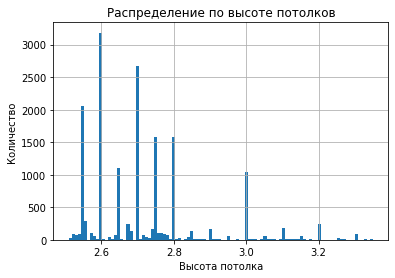

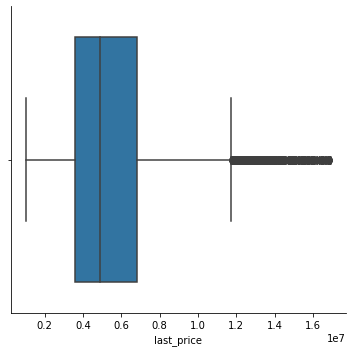

Удалено 5425 строк.
Новая медиана = 2.7
Новое среднее = 2.7158829024287354
Отношение новой медианы к исходной = 1.0188679245283019
Отношение нового среднего к исходному = 0.9799328823509925
count    16593.000000
mean         2.715883
std          0.158696
min          2.510000
25%          2.600000
50%          2.700000
75%          2.775000
max          3.350000
Name: ceiling_height, dtype: float64
__________________________________________

Всего удалено 6972 строк.


In [48]:
del_all = 0                                                       # счетчик общего количества удаленных строк
for i in parameters:                                              # проходим по списку параметров
    del_quantity = len(good_df.index)                             # число строк в таблице
    q25 = good_df[i].quantile(0.25)                               # вычисляем 1-ую квантиль
    q75 = good_df[i].quantile(0.75)                               # вычисляем 3-ую квантиль                               
    minimum = q25 - 3 * (q75 - q25)                               # нижняя граница
    maximum = q75 + 3 * (q75 - q25)                               # верхняя граница
    if i == 'last_price':
        good_df = good_df.loc[(good_df[i] > 1000000) & (good_df[i] >= minimum) & (good_df[i] <= maximum)].reset_index(drop=True)
    elif i == 'rooms':
        good_df = good_df.loc[(good_df[i] > 0) & (good_df[i] >= minimum) & (good_df[i] <= maximum)].reset_index(drop=True)
    elif i == 'ceiling_height':
        good_df = good_df.loc[(good_df[i] > 2.5) & (good_df[i] >= minimum) & (good_df[i] <= maximum)].reset_index(drop=True)
    else:
        good_df = good_df.loc[(good_df[i] >= minimum) & (good_df[i] <= maximum)].reset_index(drop=True)
    
    ax = good_df[i].hist(bins=100)
    ax.set_title(parameters.get(i))
    ax.set_ylabel('Количество')
    ax.set_xlabel(parameters_x.get(i))
    ax1 = sns.catplot(kind='box', x='last_price', data=good_df)
    del_all += del_quantity - len(good_df.index)
    print(i)
    plt.show()
    print('Удалено {} строк.'.format(del_quantity - len(good_df.index)))
    print('Новая медиана = {}'.format(good_df[i].median()))
    print('Новое среднее = {}'.format(good_df[i].mean()))
    print('Отношение новой медианы к исходной = {}'.format(good_df[i].median() / df[i].median()))
    print('Отношение нового среднего к исходному = {}'.format(good_df[i].mean() / df[i].mean()))
    print(good_df[i].describe().T)
    print('__________________________________________')
    print()
print('Всего удалено {} строк.'.format(del_all)) 

Из из можно сделать следующие выводы:  

***Цена***  
Диаграмма по форме схожа с распределением Пирсона. Максимальные значения (около 8800) достигаются при значении цены около 4 млн. От 4 до 8 млн наблюдается резкий спад количества объявлений. При цене свыше 8 млн. распределение имеет более пологую траекторию. В результате фильтрации медиана и среднее сместились в сторону уменьшения. При этом среднее сместилось в большей степени, по значению приблизившись к медиане.  
Диапазон значений параметра - 1,01-16,9 млн.  
Количество исключенных из исследования объектов - 1212.  

***Общая площадь***  
Диаграмма по форме схожа с распределением Пирсона. Максимальные значения (более 1000) достигаются при значении площади около 40 кв.м. От 40 до 100 кв.м. наблюдается резкий спад количества объявлений. При площади свыше 100 кв.м. распределение имеет более пологую траекторию. На диаграмме видны значительные локальные максимумы, что, вероятно, является последствием типовой застройки: продаются типовые квартиры одинаковой планировки. В результате фильтрации медиана и среднее сместились в сторону уменьшения. При этом среднее сместилось в большей степени, по значению приблизившись к медиане.  
Диапазон значений параметра - 12,0-146,9 кв.м.  
Количество исключенных из исследования объектов - 143.  

***rooms***  
Максимальное значение (около 8000) наблюдается у однокомнатных квартир. Немногим меньше объявлений для двухкомнатных. Затем наблюдается резкое падение до 1000, у четырехкомнатных. Для 6 и 7 комнат значения близки к нулю. В результате фильтрации медиана осталась неизменной, а среднее сместилось в сторону уменьшения, приблизившись к значению медианы.  
Диапазон значений параметра - 1-7.  
Количество исключенных из исследования объектов - 192.  

***Высота потолка***
Диаграмма по форме схожа с распределением Пирсона. Максимальные значения (около 3200) достигаются при высоте потолков 2,6 м. Далее следуют несколько локальных максимумов, постепенно снижающихся до 1000 объявлений для объектов с высотой потолка 3 метра. Во всем диапазоне высоты потолков присутствуют небольшое количество (не превышающее 500 для каждой высоты) объектов, видимо, не типовой застройки. В результате фильтрации медиана возросла, а среднее сместилось в сторону уменьшения, приблизившись к значению медианы.  
Диапазон значений параметра - 2,51-3,35 м.  
Количество исключенных из исследования объектов - 5425.  

Выводим общую информацию об отредактированной таблицы:

In [49]:
good_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16593 entries, 0 to 16592
Data columns (total 29 columns):
total_images            16593 non-null uint8
last_price              16593 non-null uint32
total_area              16593 non-null float64
first_day_exposition    16593 non-null object
rooms                   16593 non-null uint8
ceiling_height          16593 non-null float64
floors_total            16593 non-null uint8
living_area             16592 non-null float64
floor                   16593 non-null uint8
is_apartment            2065 non-null object
studio                  16593 non-null bool
open_plan               16593 non-null bool
kitchen_area            16588 non-null float64
balcony                 16593 non-null uint8
locality_name           16593 non-null object
airports_nearest        13412 non-null float64
cityCenters_nearest     12875 non-null float64
parks_around3000        12876 non-null float64
parks_nearest           5435 non-null float64
ponds_around3000    

Выводим описательную статистику для числовых значений отредактированной таблицы:

In [50]:
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,16593.0,9.901886e+00,5.642614e+00,0.000000e+00,6.000000e+00,1.000000e+01,1.400000e+01,5.000000e+01
last_price,16593.0,5.605473e+06,2.878631e+06,1.030000e+06,3.600000e+06,4.890000e+06,6.850000e+06,1.691307e+07
total_area,16593.0,5.720079e+01,2.143338e+01,1.200000e+01,4.000000e+01,5.300000e+01,7.000000e+01,1.468000e+02
rooms,16593.0,1.952088e+00,9.178829e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
ceiling_height,16593.0,2.715883e+00,1.586964e-01,2.510000e+00,2.600000e+00,2.700000e+00,2.775000e+00,3.350000e+00
floors_total,16593.0,1.193865e+01,6.924207e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,6.000000e+01
living_area,16592.0,3.204081e+01,1.492860e+01,2.000000e+00,1.830000e+01,3.000000e+01,4.200000e+01,1.280000e+02
floor,16593.0,6.459832e+00,5.231326e+00,1.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00,3.300000e+01
kitchen_area,16588.0,1.056315e+01,4.286230e+00,1.300000e+00,8.000000e+00,1.000000e+01,1.200000e+01,6.400000e+01
balcony,16593.0,6.380401e-01,9.929255e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Количество строк по сравнению с исходной уменьшено на 30% (с 23699 до 16593).

### Исследование значений времени продажи квартиры

Строим диаграмму распределения значений:

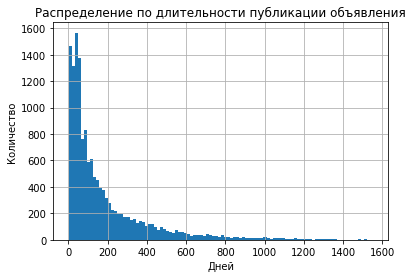

In [51]:
ax = good_df['days_exposition'].hist(bins=100)
ax.set_title('Распределение по длительности публикации объявления')
ax.set_ylabel('Количество')
ax.set_xlabel('Дней')
plt.show()

Строим диаграмму размаха:

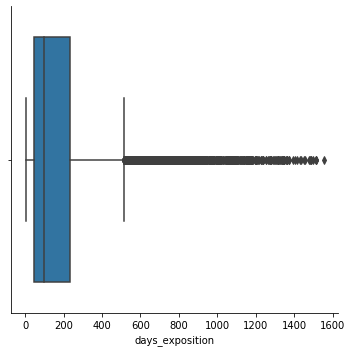

In [52]:
sns.catplot(kind='box', x='days_exposition', data=good_df)
plt.show()

Минимальный срок размещения объявления - 0 дней, чего недостаточно для поиска потенциальных покупателей, организации просмотра, подготовки документов и выхода на сделку. Примем минимальное время оформления купли-продажи в 45 дней.  
Проверяем, какой процент объявлений снимается в течение первых 45 дней:

In [53]:
print('Количество объектов, выставленных на продажу меньше 45 дней = {: 0.2%}'
      .format(len(good_df.query('days_exposition < 45')) / len(good_df)))

Количество объектов, выставленных на продажу меньше 45 дней =  21.55%


По диаграмме размаха видно, что есть значительные выбросы за Q3+1,5*IQR.  
Выбираем для исследования объекты, объявления о которых находились в публикации с 45 дней до Q3+3*IQR:

In [54]:
q25_de = good_df['days_exposition'].quantile(0.25)
q75_de = good_df['days_exposition'].quantile(0.75)
maximum_de = q75_de + 3 * (q75_de - q25_de)
good_df = good_df.loc[(good_df['days_exposition'] >= 45) & (good_df['days_exposition'] <= maximum_de)].reset_index(drop=True)

Строим диаграмму распределения по выбранным для исследования значениям:

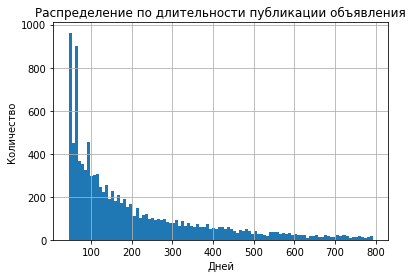

In [55]:
ax = good_df['days_exposition'].hist(bins=100)
ax.set_title('Распределение по длительности публикации объявления')
ax.set_ylabel('Количество')
ax.set_xlabel('Дней')
plt.show()

Диаграмма по форме схожа с распределением Пирсона. Максимальные значения (около 900) сроке публикации объявления 45 дней. От 45 до 200 дней наблюдается резкий спад количества объявлений. При сроке свыше 200 дней распределение имеет более пологую траекторию.

Вычисляем медиану и среднее по новым значениям и их отношение к старым:

In [56]:
print('Новая медиана "days_exposition" = {}'.format(good_df['days_exposition'].median()))
print('Новое среднее "days_exposition" = {}'.format(good_df['days_exposition'].mean()))
print('Отношение новой медианы "days_exposition" к старой = {}'
      .format(good_df['days_exposition'].median() / df['days_exposition'].median()))
print('Отношение нового среднего "days_exposition" к исходному = {}'
      .format(good_df['days_exposition'].mean() / df['days_exposition'].mean()))

Новая медиана "days_exposition" = 139.0
Новое среднее "days_exposition" = 200.9546310240964
Отношение новой медианы "days_exposition" к старой = 1.4631578947368422
Отношение нового среднего "days_exposition" к исходному = 1.110930113017772


Выводим описательную статистику для числовых значений отредактированной таблицы:

In [57]:
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,10624.0,9.705761e+00,5.555927e+00,0.000000e+00,6.000000e+00,9.000000e+00,1.400000e+01,3.900000e+01
last_price,10624.0,5.524556e+06,2.832021e+06,1.030000e+06,3.600000e+06,4.800000e+06,6.700000e+06,1.691200e+07
total_area,10624.0,5.727276e+01,2.134763e+01,1.200000e+01,4.000000e+01,5.300000e+01,7.000000e+01,1.465000e+02
rooms,10624.0,1.953031e+00,9.162194e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
ceiling_height,10624.0,2.714776e+00,1.582352e-01,2.510000e+00,2.600000e+00,2.700000e+00,2.770000e+00,3.350000e+00
floors_total,10624.0,1.197233e+01,7.021503e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,6.000000e+01
living_area,10624.0,3.205456e+01,1.493217e+01,2.000000e+00,1.820000e+01,3.000000e+01,4.200000e+01,1.185000e+02
floor,10624.0,6.501035e+00,5.301757e+00,1.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00,3.200000e+01
kitchen_area,10622.0,1.056634e+01,4.154838e+00,2.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01,6.000000e+01
balcony,10624.0,6.310241e-01,9.886685e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


В результате фильтрации медиана и среднее значение "days_exposition" сместились в сторону увеличения. При этом медиана сместилась в большей степени, приблизившись к значению средней.  
Количество строк по сравнению с исходной уменьшено на 55% (с 23699 до 10624).

### Влияние основных параметров на стоимость квартиры

Необходимо определить зависимость цены от основных параметров: общей площади, количества комнат, расстояния до центра, этажа, дня недели публикации объявления, месяца и года.

***Зависимость стоимости от общей площади объекта***

Строим точечную диаграмму зависимости стоимости объекта от общей площади объекта:

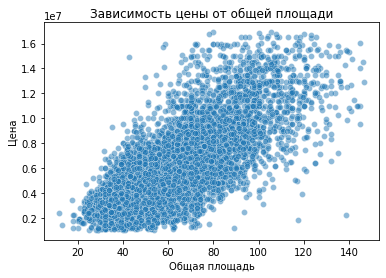

In [58]:
ax = sns.scatterplot(x='total_area', y='last_price', data=good_df, alpha=0.5)
ax.set_title('Зависимость цены от общей площади')
ax.set_ylabel('Цена')
ax.set_xlabel('Общая площадь')
plt.show()

С увеличением площади объекта цена в целом возрастает. При значениях площади объекта до 40 кв.м. наблюдается высокая плотность значений стоимости, максимальные цены растут равномерно. С увеличением площади происходит увеличение диапазона цен, а для объектов с площадью свыше 100 кв.м. рассеивание столь велико, что зависимость прослеживается слабо. 
Минимальные значения стоимости (около 1,0 млн.) в основном имеют место для объектов, площадью меньше 80 кв.м., максимальные достигают 16 млн. для 60-140 кв.м.

***Зависимость стоимости от количества комнат***

Создаем сводную таблицу, содержащую значения медиан стоимости для каждого количества комнат:

In [59]:
rooms_lp = good_df.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_lp.columns = ['rooms_price']
rooms_lp

,rooms_price
rooms,
1,3700000
2,5100000
3,6500000
4,8500000
5,9950000
6,11350000
7,13500000


Строим диаграмму зависимости цены объекта от количества комнат:

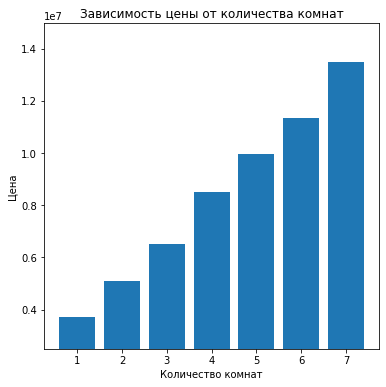

In [60]:
plt.figure(figsize=(6,6))
ax = plt.bar(rooms_lp.index, rooms_lp['rooms_price'])
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.ylim([2500000, 15000000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [61]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((rooms_lp['rooms_price'].max() - rooms_lp['rooms_price'].min()) / rooms_lp['rooms_price'].max()))

Относительная дельта максимального и минимального значение: 72.6%


Медиана стоимости объекта линейно растет с увеличением количества комнат. 
Для объектов с одной комнатой медиана стоимости имеет значение 3,0 млн., для семи комнат - свыше 13 млн.

***Зависимость стоимости от расстояния до центра***

Строим точечную диаграмму зависимости цены объекта от расстояния до центра:

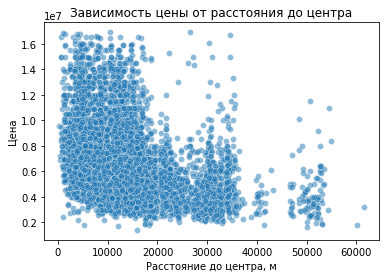

In [62]:
ax = sns.scatterplot(x='cityCenters_nearest', y='last_price', data=good_df, alpha=0.5)
ax.set_title('Зависимость цены от расстояния до центра')
ax.set_ylabel('Цена')
ax.set_xlabel('Расстояние до центра, м')
plt.show()

Максимальные цены (свыше 16 млн.) наблюдаются по большей части у объектов, находящихся не далее 18 км. от центра. После 18 км. стоимость резко снижается, большинство значений не превышает 8 млн.  
Минимальные значения стоимости слабо зависят от расстояния до центра, колеблются в районе 2,0 млн. во всем диапазоне расстояний.

***Зависимость стоимости от этажа***

Создаем сводную таблицу, содержащую значения медиан стоимости объекта для каждого класса этажей (1 - "Первый", 2 - "Другой", 3 - "Последний"):

In [63]:
floor_df = good_df.pivot_table(index='floor_id', values='last_price', aggfunc='median')
floor_df.columns = ['floor_price']
floor_df = floor_df.rename(index={1:floor_dict.get(1), 2:floor_dict.get(2), 3:floor_dict.get(3)})
floor_df

,floor_price
floor_id,
первый,4100000
другой,4950000
последний,4590000


Строим диаграмму зависимости цены объекта от класса этажа:

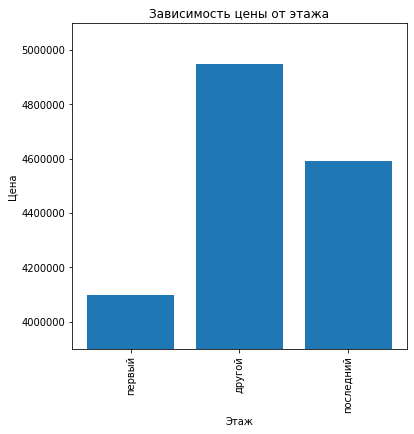

In [64]:
plt.figure(figsize=(6,6))
ax = plt.bar(floor_df.index, floor_df['floor_price'])
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.xticks(rotation=90)
plt.ylim([3900000, 5100000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [65]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((floor_df['floor_price'].max() - floor_df['floor_price'].min()) / floor_df['floor_price'].max()))

Относительная дельта максимального и минимального значение: 17.2%


Наименьшее значение медианы цены наблюдается для первого этажа - 4,1 млн. Для последнего этажа медиана цены - 4,6 млн. Наибольшую медиану цены имеют объекты класса "Другое" - 4,95 млн.

***Зависимость стоимости от даты размещения объявления***

***- Зависимость стоимости от дня недели***

Создаем функцию, извлекающую индекс дня недели из даты:

In [66]:
def dates(date):
    year = pd.to_datetime(date).year                                # определяем год
    month = pd.to_datetime(date).month                              # определяем месяц
    day = pd.to_datetime(date).day                                  # определяем день
    day_id = calendar.weekday(year, month, day)                     # Определяем день недели
    return day_id

Создаем в таблице столбец, куда добавляем индексы дней недели, в которые были опубликованы объявления:

In [67]:
good_df['day_id'] = good_df['date_exposition'].apply(dates).astype('uint8')

Создаем в таблице столбец, куда добавляем названия дней недели, в которые были опубликованы объявления:

In [68]:
day_dict = {0: 'Понедельник',
            1: 'Вторник',
            2: 'Среда',
            3: 'Четверг',
            4: 'Пятница',
            5: 'Суббота',
            6: 'Воскресение'
           }
for i in day_dict:
    good_df.loc[(good_df['day_id'] == i), 'day_classification'] = day_dict.get(i)
good_df['day_classification'] = good_df['day_classification'].astype('category')

Выводим первые 5 строк таблицы:

In [69]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_unique,price_m,date_exposition,floor_id,floor_classification,living_total_area,kitchen_total_area,day_id,day_classification
0,7,3350000,40.40,2018-12-04T00:00:00,1,2.70,11,18.60,1,NaN,...,81.0,Шушары,82920,04-12-2018,1,первый,0.460396,0.272277,3,Четверг
1,10,5196000,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,558.0,Санкт-Петербург,92785,20-08-2015,2,другой,0.612500,0.148214,3,Четверг
2,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,121.0,Санкт-Петербург,100000,19-06-2018,2,другой,0.320000,0.410000,1,Вторник
3,6,3700000,37.30,2017-11-02T00:00:00,1,2.60,26,10.60,6,NaN,...,155.0,Парголово,99195,02-11-2017,2,другой,0.284182,0.386059,5,Суббота
4,20,2900000,33.16,2018-05-23T00:00:00,1,2.55,27,15.43,26,NaN,...,189.0,Мурино,87454,23-05-2018,2,другой,0.465320,0.265682,2,Среда


Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого дня недели:

In [70]:
day_df = good_df.pivot_table(index='day_id', values='last_price', aggfunc='median')
day_df = day_df.rename(index={0:day_dict.get(0), 1:day_dict.get(1), 2:day_dict.get(2),
                              3:day_dict.get(3), 4:day_dict.get(4), 5:day_dict.get(5),
                              6:day_dict.get(6)})
day_df

,last_price
day_id,
Понедельник,4745000
Вторник,4800000
Среда,4800000
Четверг,4840000
Пятница,4750000
Суббота,4819025
Воскресение,4800000


Строим линейный график зависимости цены объекта для каждого дня недели:

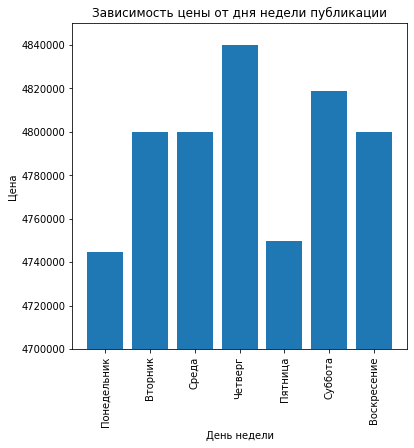

In [71]:
plt.figure(figsize=(6,6))
ax = plt.bar(day_df.index, day_df['last_price'])
plt.title('Зависимость цены от дня недели публикации')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.xticks(rotation=90)
plt.ylim([4700000, 4850000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [72]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((day_df['last_price'].max() - day_df['last_price'].min()) / day_df['last_price'].max()))

Относительная дельта максимального и минимального значение: 2.0%


Наибольшее значение медиана цены (4,80 млн) имеют объекты, объявления о которых размещены в четверг, наименьшее (около 4,75 млн.) - в понедельник и пятницу. В другие дни недели медиана цены колеблется в диапазоне 4,80-4.82.

***- Зависимость стоимости от месяца***

Создаем в таблице столбец, куда значения месяцев, в которые были опубликованы объявления:

In [73]:
good_df['month'] = pd.to_datetime(good_df['date_exposition']).dt.month

Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого месяца публикации объявления:

In [74]:
month_df = good_df.pivot_table(index='month', values='last_price', aggfunc='median')
month_df

,last_price
month,
1,4700000
2,4800000
3,4665000
4,4872500
5,4660000
6,4650000
7,4750000
8,4850000
9,4850000


Строим линейный график зависимости цены объекта для месяца публикации:

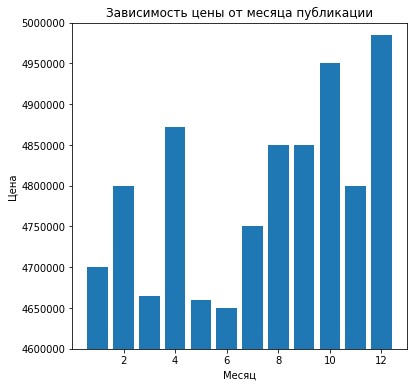

In [75]:
plt.figure(figsize=(6,6))
ax = plt.bar(month_df.index, month_df['last_price'])
plt.title('Зависимость цены от месяца публикации')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.ylim([4600000, 5000000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [76]:
print('Относительная дельта максимального и минимального значения:{: 0.1%}'
      .format((month_df['last_price'].max() - month_df['last_price'].min()) / month_df['last_price'].max()))

Относительная дельта максимального и минимального значения: 6.7%


В первой половине года цены в целом ниже, чем во второй. Присутствуют локальные максимумы, в феврале и апреле они достигают значений 4,8 млн. и 4,87 млн. соответственно. Но в январе, марте, мае и июне цены колеблются в диапазоне от 4,65 млн. до 4,70 млн.  
С 4,75 млн. в июле цена во втором полугодии возрастает до 5 млн. Из тенденции выбивается только ноябрь - цена снижается до 4,8 млн.

***- Зависимость стоимости от года***

Создаем в таблице столбец, куда значения годов, в которые были опубликованы объявления:

In [77]:
good_df['year'] = pd.to_datetime(good_df['date_exposition']).dt.year

Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого года публикации объявления:

In [78]:
year_df = good_df.pivot_table(index='year', values='last_price', aggfunc='median')
year_df

,last_price
year,
2014,7282500
2015,5183000
2016,4750000
2017,4700000
2018,4800000
2019,5300000


Строим линейный график зависимости цены объекта для года публикации:

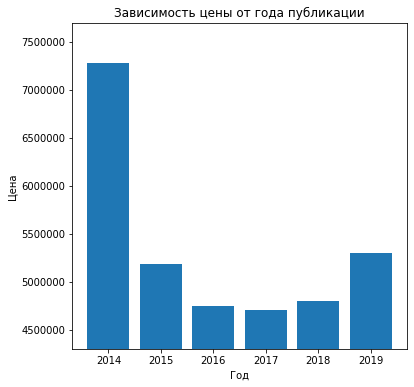

In [79]:
plt.figure(figsize=(6,6))
ax = plt.bar(year_df.index, year_df['last_price'])
plt.title('Зависимость цены от года публикации')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.ylim([4300000, 7700000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [80]:
print('Относительная дельта максимального и минимального значения:{: 0.1%}'
      .format((year_df['last_price'].max() - year_df['last_price'].min()) / year_df['last_price'].max()))

Относительная дельта максимального и минимального значения: 35.5%


В период 2014-2017 медиана цены объектов снизилась с 7,25 до 4,75 млн. К 2019 поднялась до 5,4 млн.

***Корреляция основных параметров***

Необходимо определить корреляцию основных параметров. Для этого собираем их в сводную таблицу:

In [81]:
all_corr_df = good_df.pivot_table(index=good_df.index, values=['rooms', 'floor', 'total_area', 'cityCenters_nearest', 'last_price', 'month', 'year'])

Вычисляем корреляцию параметров:

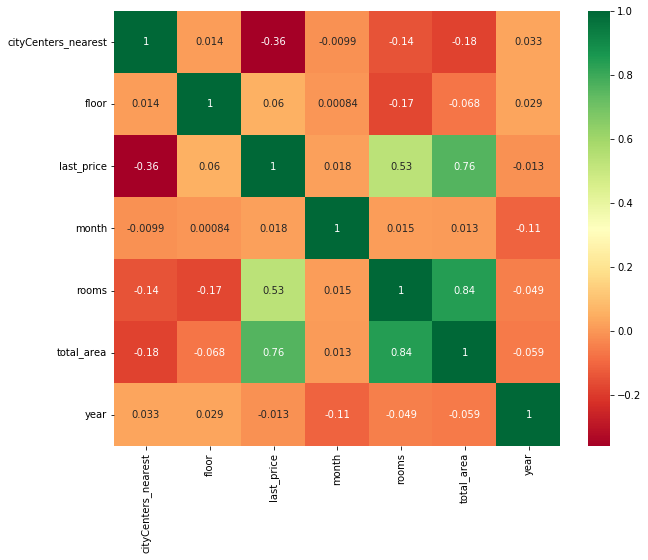

In [82]:
ax = sns.heatmap(all_corr_df.corr(), annot=True, cmap='RdYlGn')
ax.figure.set_figwidth(10)
ax.figure.set_figheight(8) 
plt.show()

Выявлена прямая корреляция следующих параметров:  
- количество комнат/общая площадь - 0,84;
- цена/общая площадь - 0,76;
- цена/количество комнат - 0,53;  

Обратная корреляция выявлена только для пары цена/расстояние до центра - минус 0,36.  
Для остальных пар величина корреляции незначительна.

### Анализ населенных пунктов с наибольшим числом объявлений.

Необходимо определить населенные пункты, по которым опубликовано наибольшее количество объявлений, и проанализировать среднюю цену в них.

Создаем сводную таблицу, содержащую десять городов с наибольшим количеством объявлений:

In [83]:
df_locality = good_df.pivot_table(index='locality_name_unique', values='balcony', aggfunc='count').astype('uint32')
df_locality.columns=['count']
df_locality = df_locality.sort_values(by='count', ascending=False)[:10]

Выводим таблицу:

In [84]:
df_locality

,count
locality_name_unique,
Санкт-Петербург,7030
Мурино,345
Кудрово,285
Шушары,271
Всеволожск,224
Парголово,205
Пушкин,160
Колпино,132
Гатчина,119


Создаем сводную таблицу, содержащую среднее значение цены по населенным пунктам:

In [85]:
df_locality_price = good_df.pivot_table(index='locality_name_unique', values='last_price', aggfunc='mean').astype('uint32')
df_locality_price.columns=['price_mean']

Объединяем таблицы:

In [86]:
df_locality = df_locality.merge(df_locality_price, on='locality_name_unique').sort_values(by='price_mean', ascending=False)

Выводим объединенную таблицу:

In [87]:
df_locality

,count,price_mean
locality_name_unique,,
Санкт-Петербург,7030,6440945
Сестрорецк,96,6327317
Пушкин,160,5988280
Парголово,205,4525846
Кудрово,285,4335795
Колпино,132,4203176
Шушары,271,4152565
Мурино,345,3739152
Всеволожск,224,3720858


Строим диаграмму распределения среднего значения цены по городам.

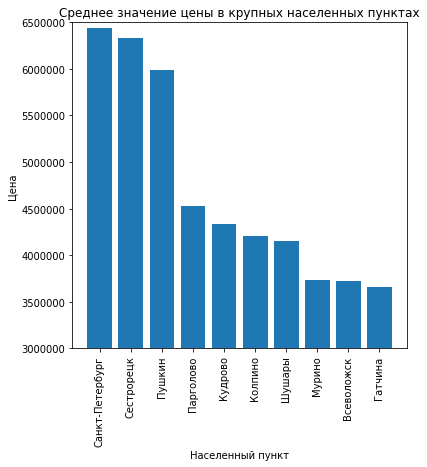

In [88]:
plt.figure(figsize=(6,6))
ax = plt.bar(df_locality.index, df_locality['price_mean'])
plt.title('Среднее значение цены в крупных населенных пунктах')
plt.ylabel('Цена')
plt.xlabel('Населенный пункт')
plt.xticks(rotation=90)
plt.ylim([3000000, 6500000])
plt.show()

В десятку населенных пунктов с наибольшим количеством объявлений о продаже недвижимости входят следующие: Санкт-Петербург (11157), Мурино (402), Шушары (333), Кудрово (325), Всеволожск (314), Пушкин (286), Колпино (249), Парголово (242), Гатчина (240), Выборг (178).  
По средней цене квартир лидерами являются Санкт-Петербург (6,44 млн), Сестрорецк (6,33 млн) и Пушкин (5,99 млн). В других населенных пунктах средние цены намного ниже: Парголово (4,52 млн), Кудрово (4,33 млн), Колпино (4,20 млн), Шушары (4,15 млн), Мурино (3,73 млн), Всеволожск (3,72 млн), Гатчина (3,65 млн).

### Анализ объектов Санкт-Петербурга по расстоянию до центра города

Необходимо определить границы центра Санкт-Петербурга и исследовать параметры недвижимости в нем.

***Определение границы центра Санкт-Петербурга***

Создаем таблицу объектов, находящиеся в Санкт-Петербурге:

In [89]:
df_spb = good_df.query('locality_name_unique == "Санкт-Петербург"').reset_index(drop=True)

Создаем сводную таблицу со средними значениями цены в зависимости от расстояния до центра:

In [90]:
median_spb = df_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')

Создаем диаграмму зависимости цены объекта, расположенного в Санкт-Петербурге, от расстояния до центра:

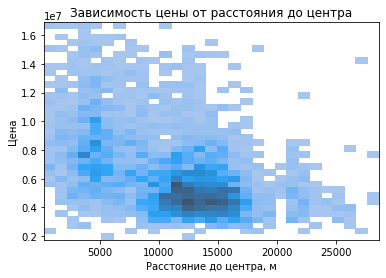

In [91]:
ax = sns.histplot(x='cityCenters_nearest', y='last_price', data=median_spb)
ax.set_title('Зависимость цены от расстояния до центра')
ax.set_ylabel('Цена')
ax.set_xlabel('Расстояние до центра, м')
plt.show()

После значения расстояния 8000 м наблюдается значительное снижение общей стоимости и увеличение плотности объектов ценой ниже 8 млн. Принимаем расстояние 8000 м за границу города.

***Анализ основных параметров недвижимости в центре Санкт-Петербурга***

Создаем в таблице по Санкт-Петербургу столбец, в котором классифицируем недвижимость по принадлежности к центру города:

In [92]:
df_spb.loc[df_spb['cityCenters_nearest'] <= 8000, 'category'] = 'Центр'
df_spb['category'] = df_spb['category'].fillna('Другое')

Создаем совмещенную диаграмму стоимости объекта:

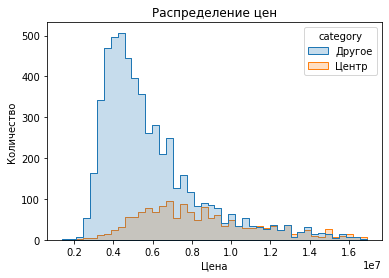

In [93]:
ax = sns.histplot(x='last_price', data=df_spb, hue='category', element="step")
ax.set_title('Распределение цен')
ax.set_ylabel('Количество')
ax.set_xlabel('Цена')
plt.show()

В центре есть три локальных пика количества объявлений (около 100) в диапазоне цен 7-9 млн.  
На окраине продается намного больше объектов стоимостью до 10 млн. На окраине наблюдается значительное увеличение количества объявлений до цены 4,2 млн (500 объявлений), а после резкий спад до 50 объявлений при цене 10 млн. После 10 млн. Диаграммы для центра и окраины практически идентичны.

Создаем совмещенную диаграмму количества комнат:

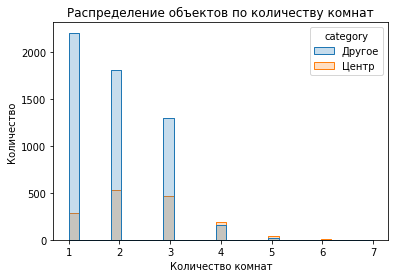

In [94]:
ax = sns.histplot(x='rooms', data=df_spb, hue='category', element="step")
ax.set_title('Распределение объектов по количеству комнат')
ax.set_ylabel('Количество')
ax.set_xlabel('Количество комнат')
plt.show()

На окраине продается больше однокомнатных квартир, нежели в центре: 2200 против 250. В центре наиболее часто продаются 2-3 комнатные объекты (около 500 объявлений для каждой). Количество 4-5 комнатных квартир в центре и на окраине отличается мало.

Создаем совмещенную диаграмму общей площади:

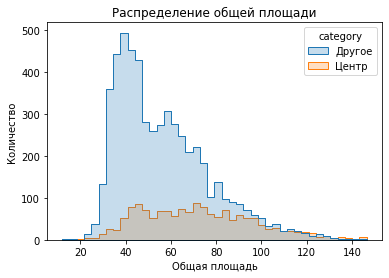

In [95]:
ax = sns.histplot(x='total_area', data=df_spb, hue='category', element="step")
ax.set_title('Распределение общей площади')
ax.set_ylabel('Количество')
ax.set_xlabel('Общая площадь')
plt.show()

В центре квартиры площадью 40-100 кв.м. распределены равномерно: количество объявлений колеблется в диапазоне 70-90 объявлений. На окраине пик количества объявлений (500) достигается при площади 40 кв.м. Далее до 100 кв.м. идет спад, после чего количество объявлений в центре и на окраине выравнивается.

Создаем совмещенную диаграмму высоты потолка:

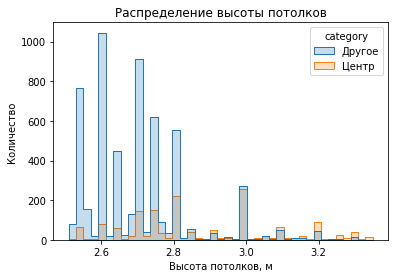

In [96]:
ax = sns.histplot(x='ceiling_height', data=df_spb, hue='category', element="step")
ax.set_title('Распределение высоты потолков')
ax.set_ylabel('Количество')
ax.set_xlabel('Высота потолков, м')
plt.show()

На диаграммах явно прослеживаются отдельно стоящие пики - стандартные высоты. В центре намного реже, чем на окраине, встречаются объявления о продаже объектов с высотой потолков ниже 3 метров. При высоте 3 метра количество объявлений выравнивается в районе значения 290. При высоте более 3 метров несколько чаще встречаются объекты, расположенные в границах центра.

***Сравнительный анализ взаимосвязи основных параметров центра и окраины Санкт-Петербурга***

Строим серию сравнительных диаграмм:

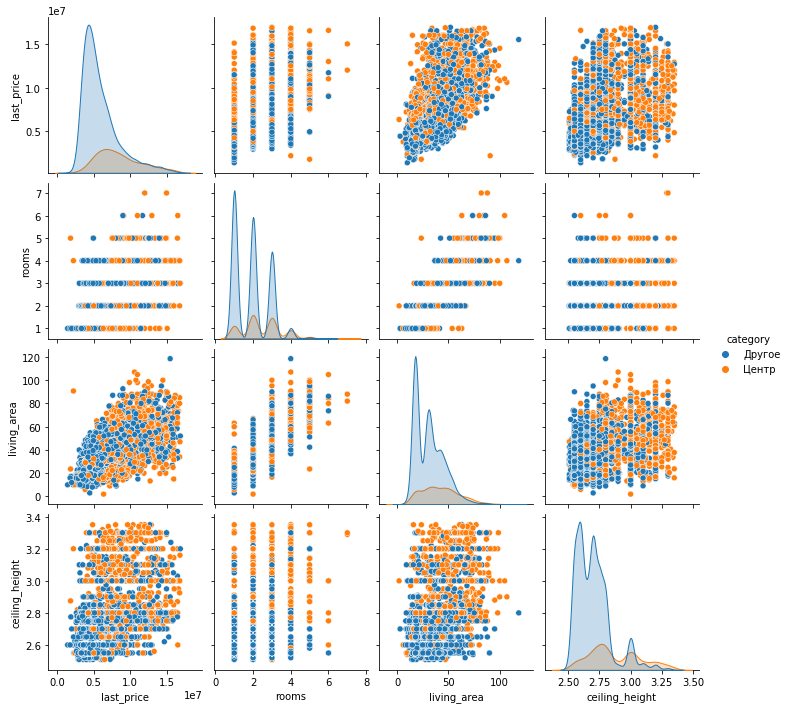

In [97]:
sns.pairplot(df_spb[['last_price', 'rooms', 'living_area', 'ceiling_height', 'category']], hue='category')

Из диаграмм можно сделать следующие выводы:
- при равной общей площади до 50 кв.м. объекты в центре стоят дороже. Ситуация выравнивается при значениях площади больше 50 кв.м.;
- при равном количестве комнат объекты в центре в целом имеют большую цену;
- В центре чаще встречаются объекты с высокими потолками (3 метра и выше).
- При равном количестве комнат высота потолков больше у объектов в центре Санкт-Петербурге.

### Анализ зависимости цены объектов в центре Санкт-Петербурга от основных параметров

***Зависимость стоимости от общей площади объекта***

Создаем таблицу, состоящую из объектов, расположенных в центре Санкт-Петербурга:

In [98]:
df_spb_center = df_spb.loc[(df_spb['cityCenters_nearest'] <= 8000) & (df_spb['category'] == 'Центр')]

Строим точечную диаграмму зависимости стоимости объекта от общей площади объекта:

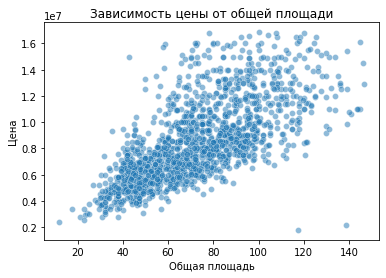

In [99]:
ax = sns.scatterplot(x='total_area', y='last_price', data=df_spb_center, alpha=0.5)
ax.set_title('Зависимость цены от общей площади')
ax.set_ylabel('Цена')
ax.set_xlabel('Общая площадь')
plt.show()

С увеличением площади объекта цена в целом возрастает. При значениях площади объекта до 40 кв.м. наблюдается высокая плотность значений стоимости. С увеличением площади происходит увеличение диапазона цен, а для объектов с площадью свыше 60 кв.м. рассеивание столь велико, что зависимость прослеживается слабо.

***Зависимость стоимости от количества комнат***

Создаем сводную таблицу, содержащую значения медиан стоимости для каждого количества комнат:

In [100]:
rooms_lp_spb = df_spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_lp_spb.columns = ['rooms_price']
rooms_lp_spb

,rooms_price
rooms,
1,5995000
2,7300000
3,8785000
4,9999500
5,10850000
6,11995000
7,13500000


Строим линейный график зависимости цены объекта от количества комнат:

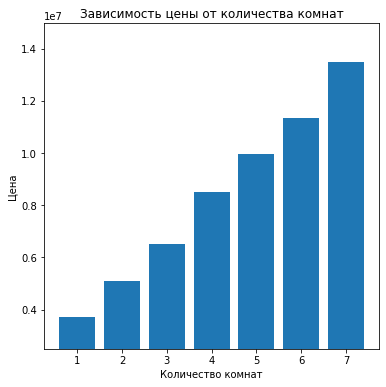

In [101]:
plt.figure(figsize=(6,6))
ax = plt.bar(rooms_lp_spb.index, rooms_lp['rooms_price'])
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.ylim([2500000, 15000000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [102]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((rooms_lp_spb['rooms_price'].max() - rooms_lp_spb['rooms_price'].min()) / rooms_lp_spb['rooms_price'].max()))

Относительная дельта максимального и минимального значение: 55.6%


Медиана стоимости объекта линейно растет с увеличением количества комнат. 
Для объектов с одной комнатой медиана стоимости имеет значение 3,9 млн., для семи комнат - 13,5 млн.

***Зависимость стоимости от расстояния до центра***

Строим точечную диаграмму зависимости цены объекта от расстояния до центра:

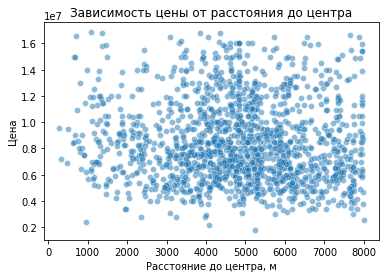

In [103]:
ax = sns.scatterplot(x='cityCenters_nearest', y='last_price', data=df_spb_center, alpha=0.5)
ax.set_title('Зависимость цены от расстояния до центра')
ax.set_ylabel('Цена')
ax.set_xlabel('Расстояние до центра, м')
plt.show()

С увеличением расстояния до центра увеличивается количество продаваемых объектов. В диапазоне 0-2300 минимальные значения цен резко снижаются с 7,1 млн. до 3 млн. При дальнейшем увеличении расстояния до центра стоимость постепенно снижается до 2,2 млн. Максимальные значения цен от расстояния до центра не зависят.

***Зависимость стоимости от этажа***

Создаем сводную таблицу, содержащую значения медиан стоимости объекта для каждого класса этажей (1 - "Первый", 2 - "Другой", 3 - "Последний"):

In [104]:
floor_df_spb = df_spb_center.pivot_table(index='floor_id', values='last_price', aggfunc='median')
floor_df_spb.columns = ['floor_price']
floor_df_spb = floor_df_spb.rename(index={1:floor_dict.get(1), 2:floor_dict.get(2), 3:floor_dict.get(3)})
floor_df_spb

,floor_price
floor_id,
первый,6100000
другой,8280000
последний,7925000


Строим линейный график зависимости цены объекта от этажа:

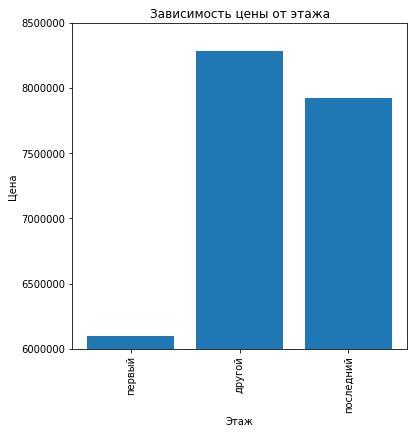

In [105]:
plt.figure(figsize=(6,6))
ax = plt.bar(floor_df_spb.index, floor_df_spb['floor_price'])
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.xticks(rotation=90)
plt.ylim([6000000, 8500000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [106]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((floor_df_spb['floor_price'].max() - floor_df_spb['floor_price'].min()) / floor_df_spb['floor_price'].max()))

Относительная дельта максимального и минимального значение: 26.3%


Наименьшее значение медианы стоимости объекта наблюдается для первого этажа - 6,1 млн. Для последнего этажа медиана стоимости - 7,9 млн. Наибольшую медиану стоимости имеют объекты класса "Другое" - 8,3 млн.

***Зависимость стоимости от даты размещения объявления***

***- Зависимость стоимости от дня недели***

Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого дня недели:

In [107]:
day_df_spb = df_spb_center.pivot_table(index='day_id', values='last_price', aggfunc='median')
day_df_spb = day_df_spb.rename(index={0:day_dict.get(0), 1:day_dict.get(1), 2:day_dict.get(2),
                              3:day_dict.get(3), 4:day_dict.get(4), 5:day_dict.get(5),
                              6:day_dict.get(6)})
day_df_spb

,last_price
day_id,
Понедельник,8200000
Вторник,7500000
Среда,8000000
Четверг,7600000
Пятница,8045000
Суббота,7790000
Воскресение,8100000


Строим линейный график зависимости цены объекта для каждого дня недели:

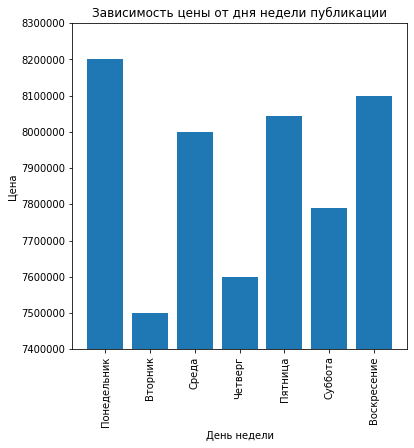

In [108]:
plt.figure(figsize=(6,6))
ax = plt.bar(day_df_spb.index, day_df_spb['last_price'])
plt.title('Зависимость цены от дня недели публикации')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.xticks(rotation=90)
plt.ylim([7400000, 8300000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [109]:
print('Относительная дельта максимального и минимального значение:{: 0.1%}'
      .format((day_df_spb['last_price'].max() - day_df_spb['last_price'].min()) / day_df_spb['last_price'].max()))

Относительная дельта максимального и минимального значение: 8.5%


Наибольшее значение медиана цены (8,2 млн) имеют объекты, объявления о которых размещены в понедельник, наименьшее (7,5 млн.) - во вторник. Со вторника по воскресенье цена в среднем увеличивается до 8,1 млн, при этом локальные максимумы и минимумы чередуются через день.

***- Зависимость стоимости от месяца***

Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого месяца публикации объявления:

In [110]:
month_df_spb = df_spb_center.pivot_table(index='month', values='last_price', aggfunc='median')
month_df_spb

,last_price
month,
1,8050000.0
2,8000000.0
3,7800000.0
4,7990000.0
5,6999000.0
6,7800000.0
7,8068697.5
8,7297000.0
9,8450000.0


Строим линейный график зависимости цены объекта для месяца публикации:

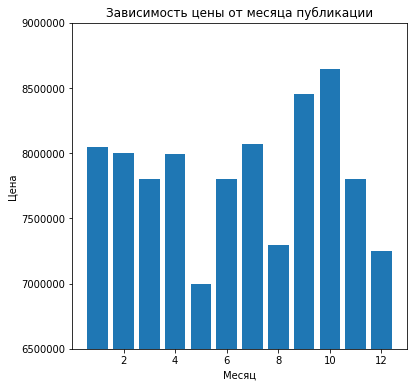

In [111]:
plt.figure(figsize=(6,6))
ax = plt.bar(month_df_spb.index, month_df_spb['last_price'])
plt.title('Зависимость цены от месяца публикации')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.ylim([6500000, 9000000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [112]:
print('Относительная дельта максимального и минимального значения:{: 0.1%}'
      .format((month_df_spb['last_price'].max() - month_df_spb['last_price'].min()) / month_df_spb['last_price'].max()))

Относительная дельта максимального и минимального значения: 19.0%


В течении года медиана цены в основном колеблется в диапазоне 7,8-8,1 млн. Присутствуют спады в мае (7,0 млн), августе (7,25 млн), декабре (7,2 млн). В сентябре медиана цены вырастает до 8,4 млн, а в октябре - 8,5 млн.

***- Зависимость стоимости от года***

Создаем сводную таблицу, в которой рассчитывается медиана стоимости объекта для каждого года публикации объявления:

In [113]:
year_df_spb = df_spb_center.pivot_table(index='year', values='last_price', aggfunc='median')
year_df_spb

,last_price
year,
2014,9000000
2015,7200000
2016,8000000
2017,7835000
2018,8100000
2019,7700000


Строим линейный график зависимости цены объекта для года публикации:

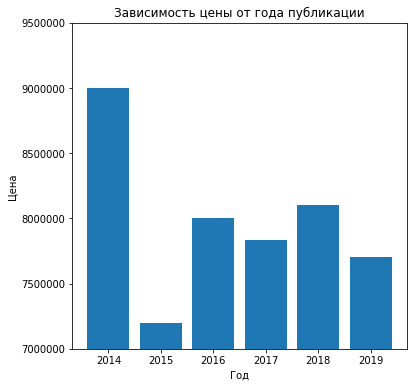

In [114]:
plt.figure(figsize=(6,6))
ax = plt.bar(year_df_spb.index, year_df_spb['last_price'])
plt.title('Зависимость цены от года публикации')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.ylim([7000000, 9500000])
plt.show()

Вычисляем относительную дельту максимального и минимального значений:

In [115]:
print('Относительная дельта максимального и минимального значения:{: 0.1%}'
      .format((year_df_spb['last_price'].max() - year_df_spb['last_price'].min()) / year_df_spb['last_price'].max()))

Относительная дельта максимального и минимального значения: 20.0%


Максимальная медиана цены наблюдалась в 2014 году - 9,0 млн. В 2015 происходит резкое падение до 7,2 млн. В период 2016-2019 медиана цены колеблется в диапазоне 7,7 до 8,1 млн.

***Корреляция основных параметров***

Для объектов, расположенных в центре города, определяем корреляцию основных цены с основными параметрами: количеством комнат, этажа, расстояния до центра и года публикации объявления.  
Создаем сводную таблицу по данным параметрам:

In [116]:
df_corr_spb = df_spb_center.pivot_table(index=df_spb_center.index, values=['rooms', 'floor', 'total_area', 'cityCenters_nearest', 'last_price', 'month', 'year'])

Определяем кореляцию параметров:

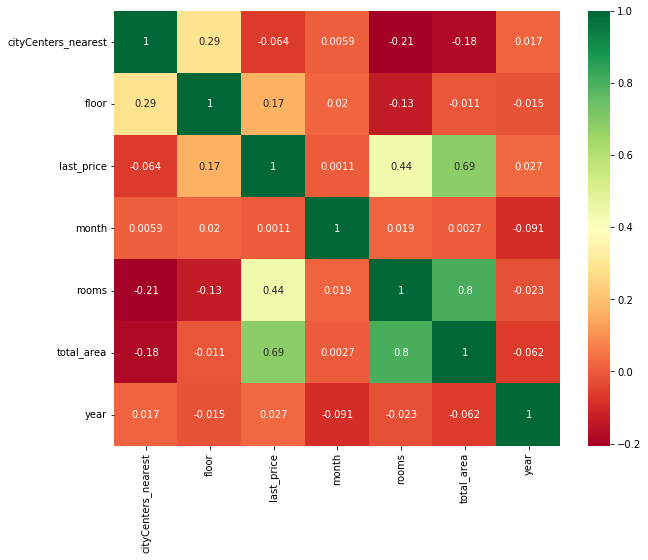

In [117]:
ax = sns.heatmap(df_corr_spb.corr(), annot=True, cmap='RdYlGn')
ax.figure.set_figwidth(10)
ax.figure.set_figheight(8)
plt.show()

Выявлена прямая корреляция следующих параметров:

- количество комнат/общая площадь - 0,80;
- цена/общая площадь - 0,69;
- цена/количество комнат - 0,44;

Для остальных пар величина корреляции незначительна.
Для центра Санкт-Петербурга корреляция параметров выражена меньше, чем для всех исследуемых населенных пунктов в целом. 

Выводим общую информацию о таблице:

In [118]:
good_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10624 entries, 0 to 10623
Data columns (total 33 columns):
total_images            10624 non-null uint8
last_price              10624 non-null uint32
total_area              10624 non-null float64
first_day_exposition    10624 non-null object
rooms                   10624 non-null uint8
ceiling_height          10624 non-null float64
floors_total            10624 non-null uint8
living_area             10624 non-null float64
floor                   10624 non-null uint8
is_apartment            1467 non-null object
studio                  10624 non-null bool
open_plan               10624 non-null bool
kitchen_area            10622 non-null float64
balcony                 10624 non-null uint8
locality_name           10624 non-null object
airports_nearest        8587 non-null float64
cityCenters_nearest     8234 non-null float64
parks_around3000        8234 non-null float64
parks_nearest           3473 non-null float64
ponds_around3000       

### Вывод

У основных параметры удалены редкие и выбивающиеся значения.  
Для основных параметров для исследования выбраны следующие диапазоны значений:
- цена на момент снятия с публикации ("last_price"): от 1 млн до Q3+3*IQR;
- общая площадь ("total_area"): от Q1-3*IQR до Q3+3*IQR;
- количества комнат ("rooms"): от 1 до Q3+3*IQR;
- высота потолков ("ceiling_height"): от 2,5 м до Q3+3*IQR;
- сколько дней было размещено объявление ("days_exposition"): от 45 дней до Q3+3*IQR.  

Максимумы диаграмм сильно смещены в сторону меньших значений. По структуре диаграммы близки к распределению Пирсона.  
Количество объектов по отношению к исходной таблице сократилось на 55% (c 23699 до 10624).  

Определены основные параметры, оказывающие значительное влияние на цену: общая площадь (корреляция 0,76 для всех населенных пунктов и 0,69 для центра Санкт-Петербурга), количество комнат (корреляция 0,53 для всех населенных пунктов и 0,44 для центра Санкт-Петербурга), расстояние до центра (корреляция минус 0,36 для всех населенных пунктов).

Определены 10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург (11157), Мурино (402), Шушары (333), Кудрово (325), Всеволожск (314), Пушкин (286), Колпино (249), Парголово (242), Гатчина (240), Выборг (178).
По средней цене квартир лидерами являются Санкт-Петербург (6,44 млн), Сестрорецк (6,33 млн) и Пушкин (5,99 млн). В других населенных пунктах средние цены намного ниже: Парголово (4,52 млн), Кудрово (4,33 млн), Колпино (4,20 млн), Шушары (4,15 млн), Мурино (3,73 млн), Всеволожск (3,72 млн), Гатчина (3,65 млн).
 

На основе распределения цен в зависимости от расстояния до центра определена граница центра - 8000 м.  

Проведен анализ объектов в центре города, данные сопоставлены с параметрами недвижимости, расположенной на окраине. Выявлено что для малых значений параметров количество объектов на окраине намного больше, нежели в центре. При увеличении значений параметров количество объявлений выравнивается. У квартир на окраине наиболее часто встречается высота потолка 2,6 метра, а в центре - 3 метра.  
При равной общей площади до 50 кв.м. объекты в центре стоят дороже. Ситуация выравнивается при значениях площади больше 50 кв.м.;  
При равном количестве комнат объекты в центре в целом имеют большую цену;  
При равном количестве комнат высота потолков больше у объектов в центре Санкт-Петербурге.

## Общий вывод

В исследовании произведен анализ рынка недвижимости Санкт-Петербурга и близлежащих населенных пунктов. В результате предобработки данных для исследования было отобрано 10624 объектов из 23699 (45%).  

Рассчитаны и добавлены в таблицу:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади;
- отношение площади кухни к общей.

Проанализированы основные параметры объектов: площадь, цена, число комнат, высота потолков, время продажи квартиры. Убраны редкие и выбивающиеся значения.  

Для всего массива объектов определена зависимость цены от основных параметров:
- общая площадь: цена прямо пропорционально зависит от величины общей площади;
- количество комнат: медиана цены объекта увеличивается от 3 млн. за однокомнатный до 13 млн. за семикомнатный. 
- расстояние до центра: чем ближе к центру, тем выше максимальная стоимость. Резкое падение максимальной цены наблюдается на уровне 15 км от центра - с 16 млн. до 8 млн.  
- этаж: наименее ценны объекты, расположенные на первом этаже: медиана цены – 4,1 млн. Для последнего этажа медиана цены несколько выше - 4,59 млн. Наибольшая медиана цены наблюдается у объектов, расположенных на других этажах, - 4,95 млн.  
- день недели публикации объявления: временной диапазон (неделя) слишком мал, чтобы делать по нему какие-либо выводы. На результат возможно оказание большого влияния “шумами”;  
- месяц публикации объявления: в первой половине года цены в целом ниже, чем во втором. Присутствуют локальные максимумы в феврале и апреле достигают значений 4,8 млн. и 4,87 млн. соответственно. Но в январе, марте, мае и июне цены колеблются в диапазоне от 4,65 млн. до 4,70 млн. С 4,75 млн. в июле цена во втором полугодии возрастает до 5 млн. Из тенденции выбивается только ноябрь - цена снижается до 4,8 млн.
- год публикации объявления: в период 2014-2017 медиана цены объектов снизилась с 7,25 до 4,75 млн. К 2019 поднялась до 5,4 млн.

Определены основные параметры, оказывающие значительное влияние на цену: общая площадь (корреляция 0,76 для всех населенных пунктов и 0,69 для центра Санкт-Петербурга), количество комнат (корреляция 0,53), расстояние до центра (корреляция минус 0,36 для всех населенных пунктов).

Определены 10 населённых пунктов с наибольшим числом объявлений: Санкт-Петербург (11157), Мурино (402), Шушары (333), Кудрово (325), Всеволожск (314), Пушкин (286), Колпино (249), Парголово (242), Гатчина (240), Выборг (178).
По средней цене квартир лидерами яаляются Санкт-Петербург (6,44 млн), Сестрорецк (6,33 млн) и Пушкин (5,99 млн). В других населенных пунктах средние цены намного ниже: Парголово (4,52 млн), Кудрово (4,33 млн), Колпино (4,20 млн), Шушары (4,15 млн), Мурино (3,73 млн), Всеволожск (3,72 млн), Гатчина (3,65 млн).  

Определена граница центра Санкт-Петербурга - 8000 метров.  

Для объектов, находящихся в центре Санкт-Петербурга, проанализированы основные параметры:
- цена объекта: в объявлениях наиболее часто встречаются цены, близкие к 7-9 млн. В центре количество объектов стоимостью ниже 10 млн. намного меньше, чем на окраинах. При цене свыше 10 млн. количество выравнивается.
- количества комнат: в объявления о продаже объектов, находящихся в центре, чаще других встречаются двухкомнатные и трехкомнатные объекты - около 500 тех и других;
- общая площадь: в объявления о продаже объектов, находящихся в центре, чаще других встречаются площадью 45-70 кв.м.
- высота потолка: наиболее часто встречаются объекты с высотой потолка 3 метра - около 290 объектов.  

Определены основные параметры, оказывающие значительное влияние на цену объектов, расположенных в центре Санкт-Петербурга: общая площадь (корреляция 0,69), количество комнат (корреляция 0,44).